In [159]:
import numpy as np
import pandas as pd
import scipy
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import datetime
from tqdm import tqdm

In [160]:
import warnings
warnings.filterwarnings('ignore')

In [161]:
url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vR7cOF5NSArcxNxYjzDjjTnFNmG-l0zM8WqabuCqNmwKke7VTEMKjR1BamqigAFeRCvbhCylaspQpTG/pub?gid=0&single=true&output=csv'
approval = pd.read_csv(url)
approval

,issue,pollster,start_date,end_date,sample_size,population,approve,disapprove,net,url,sponsor,mode
0,economy,Ipsos,03/31/2025,04/02/2025,1486,A,37.0,52.0,-15.0,https://www.ipsos.com/sites/default/files/ct/n...,Reuters,NaN
1,economy,YouGov,04/05/2025,04/08/2025,1741,A,41.0,51.0,-10.0,https://d3nkl3psvxxpe9.cloudfront.net/document...,The Economist,NaN
2,economy,YouGov,03/27/2025,03/28/2025,2609,A,48.0,52.0,-4.0,https://www.cbsnews.com/news/opinion-poll-trum...,CBS News,NaN
3,economy,Harris Insights & Analytics,03/26/2025,03/27/2025,2746,RV,45.0,55.0,-10.0,https://harvardharrispoll.com/wp-content/uploa...,Harvard CAPS,NaN
4,economy,J.L. Partners,03/25/2025,03/27/2025,1001,RV,45.0,55.0,-10.0,https://www.dailymail.co.uk/news/article-14547...,Daily Mail,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1154,economy,YouGov,09/25/2025,09/29/2025,1676,A,38.0,56.0,-18.0,https://www.scribd.com/document/925455404/Comb...,Yahoo News,Online Matched Sample
1155,trade_tariffs,YouGov,09/25/2025,09/29/2025,1676,A,34.0,57.0,-23.0,https://www.scribd.com/document/925455404/Comb...,Yahoo News,Online Matched Sample
1156,immigration,YouGov,09/25/2025,09/29/2025,1676,A,43.0,52.0,-9.0,https://www.scribd.com/document/925455404/Comb...,Yahoo News,Online Matched Sample
1157,charlie_kirk_death,YouGov,09/25/2025,09/29/2025,1676,A,37.0,46.0,-9.0,https://www.scribd.com/document/925455404/Comb...,Yahoo News,Online Matched Sample


In [162]:
approval.to_csv('president-issue-approval-polling.csv')

In [163]:
approval[approval['issue']=='economy'].shape

(185, 12)

In [164]:
approval['sponsor'] = approval['sponsor'].fillna('na')

In [165]:
approval

,issue,pollster,start_date,end_date,sample_size,population,approve,disapprove,net,url,sponsor,mode
0,economy,Ipsos,03/31/2025,04/02/2025,1486,A,37.0,52.0,-15.0,https://www.ipsos.com/sites/default/files/ct/n...,Reuters,NaN
1,economy,YouGov,04/05/2025,04/08/2025,1741,A,41.0,51.0,-10.0,https://d3nkl3psvxxpe9.cloudfront.net/document...,The Economist,NaN
2,economy,YouGov,03/27/2025,03/28/2025,2609,A,48.0,52.0,-4.0,https://www.cbsnews.com/news/opinion-poll-trum...,CBS News,NaN
3,economy,Harris Insights & Analytics,03/26/2025,03/27/2025,2746,RV,45.0,55.0,-10.0,https://harvardharrispoll.com/wp-content/uploa...,Harvard CAPS,NaN
4,economy,J.L. Partners,03/25/2025,03/27/2025,1001,RV,45.0,55.0,-10.0,https://www.dailymail.co.uk/news/article-14547...,Daily Mail,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1154,economy,YouGov,09/25/2025,09/29/2025,1676,A,38.0,56.0,-18.0,https://www.scribd.com/document/925455404/Comb...,Yahoo News,Online Matched Sample
1155,trade_tariffs,YouGov,09/25/2025,09/29/2025,1676,A,34.0,57.0,-23.0,https://www.scribd.com/document/925455404/Comb...,Yahoo News,Online Matched Sample
1156,immigration,YouGov,09/25/2025,09/29/2025,1676,A,43.0,52.0,-9.0,https://www.scribd.com/document/925455404/Comb...,Yahoo News,Online Matched Sample
1157,charlie_kirk_death,YouGov,09/25/2025,09/29/2025,1676,A,37.0,46.0,-9.0,https://www.scribd.com/document/925455404/Comb...,Yahoo News,Online Matched Sample


In [166]:
ratings = pd.read_csv('pollster_ratings_silver.csv')
ratings

,Pollster,Grade,Predictive Plus-Minus,Mean-reverted bias,Number of polls,cat
0,AtlasIntel,A+@@1,-0.957740,D+0.16@@0.16334188,91,D+
1,Marquette University Law School,A/B@@4,-0.920261,D+0.32@@0.31545374,17,D+
2,The Washington Post,A+@@1,-0.902281,D+0.90@@0.89811021,98,D+
3,Research & Polling Inc.,A@@2,-0.871136,R+0.55@@-0.54944503,44,R+
4,The New York Times/Siena College,A@@2,-0.763947,D+1.41@@1.4121077,116,D+
...,...,...,...,...,...,...
530,Nielson Brothers Polling,C/D@@12,1.946864,D+3.05@@3.0515239,11,D+
531,Ascend Action,C/D@@12,2.282717,D+3.35@@3.3485439,6,D+
532,Jayhawk Consulting Services,C/D@@12,2.353968,D+2.27@@2.2674108,2,D+
533,Fort Hays State University,C/D@@12,2.489170,R+1.10@@-1.0960908,6,R+


In [167]:
ratings[ratings['Pollster']=='Hart Research Associates/Public Opinion Strategies']

,Pollster,Grade,Predictive Plus-Minus,Mean-reverted bias,Number of polls,cat
31,Hart Research Associates/Public Opinion Strate...,B+@@5,-0.250934,D+0.85@@0.85034752,37,D+


In [168]:
# approval[approval['pollster']=='Hart Research Associates/Public Opinion Strategies']

In [169]:
banned_pollsters = ratings[ratings['Grade'].str.contains('F')]['Pollster'].values
banned_pollsters

array(['Strategic Vision LLC', 'Pharos Research Group', 'Research 2000',
       'Big Data Poll', 'Overtime Politics', 'Rethink Priorities',
       'Blumenthal Research Daily', 'CSP Polling', 'KG Polling',
       'OurProgress (The Progress Campaign)', 'TCJ Research'],
      dtype=object)

In [170]:
approval = approval[~approval['pollster'].isin(banned_pollsters)]
approval.shape

(1159, 12)

In [171]:
approval['pollster'].value_counts()

pollster
YouGov                                                348
Ipsos                                                 143
Morning Consult                                        84
AtlasIntel                                             68
Verasight                                              57
Quinnipiac University                                  57
Harris Insights & Analytics                            36
Echelon Insights                                       33
Beacon Research/Shaw & Co. Research                    29
AP-NORC                                                27
RMG Research                                           26
Gallup                                                 26
SSRS                                                   23
Clarity Campaign Labs                                  22
Hart Research Associates/Public Opinion Strategies     21
Pew Research Center                                    20
Emerson College                                        15
John 

In [172]:
approval = pd.merge(left=approval, right=ratings[['Pollster', 'Predictive Plus-Minus']], left_on='pollster',
                   right_on='Pollster', how='left')
approval

,issue,pollster,start_date,end_date,sample_size,population,approve,disapprove,net,url,sponsor,mode,Pollster,Predictive Plus-Minus
0,economy,Ipsos,03/31/2025,04/02/2025,1486,A,37.0,52.0,-15.0,https://www.ipsos.com/sites/default/files/ct/n...,Reuters,NaN,Ipsos,0.442898
1,economy,YouGov,04/05/2025,04/08/2025,1741,A,41.0,51.0,-10.0,https://d3nkl3psvxxpe9.cloudfront.net/document...,The Economist,NaN,YouGov,0.047635
2,economy,YouGov,03/27/2025,03/28/2025,2609,A,48.0,52.0,-4.0,https://www.cbsnews.com/news/opinion-poll-trum...,CBS News,NaN,YouGov,0.047635
3,economy,Harris Insights & Analytics,03/26/2025,03/27/2025,2746,RV,45.0,55.0,-10.0,https://harvardharrispoll.com/wp-content/uploa...,Harvard CAPS,NaN,Harris Insights & Analytics,0.162447
4,economy,J.L. Partners,03/25/2025,03/27/2025,1001,RV,45.0,55.0,-10.0,https://www.dailymail.co.uk/news/article-14547...,Daily Mail,NaN,J.L. Partners,0.197911
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1154,economy,YouGov,09/25/2025,09/29/2025,1676,A,38.0,56.0,-18.0,https://www.scribd.com/document/925455404/Comb...,Yahoo News,Online Matched Sample,YouGov,0.047635
1155,trade_tariffs,YouGov,09/25/2025,09/29/2025,1676,A,34.0,57.0,-23.0,https://www.scribd.com/document/925455404/Comb...,Yahoo News,Online Matched Sample,YouGov,0.047635
1156,immigration,YouGov,09/25/2025,09/29/2025,1676,A,43.0,52.0,-9.0,https://www.scribd.com/document/925455404/Comb...,Yahoo News,Online Matched Sample,YouGov,0.047635
1157,charlie_kirk_death,YouGov,09/25/2025,09/29/2025,1676,A,37.0,46.0,-9.0,https://www.scribd.com/document/925455404/Comb...,Yahoo News,Online Matched Sample,YouGov,0.047635


In [173]:
approval['pollster'].value_counts()

pollster
YouGov                                                348
Ipsos                                                 143
Morning Consult                                        84
AtlasIntel                                             68
Verasight                                              57
Quinnipiac University                                  57
Harris Insights & Analytics                            36
Echelon Insights                                       33
Beacon Research/Shaw & Co. Research                    29
AP-NORC                                                27
RMG Research                                           26
Gallup                                                 26
SSRS                                                   23
Clarity Campaign Labs                                  22
Hart Research Associates/Public Opinion Strategies     21
Pew Research Center                                    20
Emerson College                                        15
John 

In [174]:
auxiliary = pd.read_csv('auxiliary_pollster_rating_stats.csv')
auxiliary

,Pollster,Correct calls,Outside MoE,House effect,ADPA,Herding penalty,herd_cat,p_cat
0,AtlasIntel,0.840659,8.8%@@91.208791,R+2.00@@-1.9990723,3.7@@3.6687982,0.096047,2,R+
1,The Washington Post,0.693878,6.1%@@93.877551,D+1.02@@1.0173736,3.6@@3.5756676,0.221841,3,D+
2,Research & Polling Inc.,0.886364,9.1%@@90.9090906,D+0.63@@0.63289553,4.6@@4.642076,0.286276,3,D+
3,The New York Times/Siena College,0.737069,18.1%@@81.896552,D+0.79@@0.79133403,3.2@@3.2483816,0.280332,3,D+
4,Cygnal,0.939655,13.8%@@86.206897,R+0.60@@-0.59704119,3.5@@3.4644768,0.521310,4,R+
...,...,...,...,...,...,...,...,...
93,Digital Research,0.904762,38.1%@@61.904761,R+2.44@@-2.4431372,11.4@@11.413808,0.000000,1,R+
94,Mitchell Research & Communications,0.695122,39%@@60.975611,R+0.45@@-0.44617203,4.4@@4.4410443,0.229193,3,R+
95,Merriman River Group,0.840000,60%@@39.999998,R+3.23@@-3.2347174,10.3@@10.260222,0.000000,1,R+
96,McLaughlin & Associates,0.689655,34.5%@@65.517241,R+4.94@@-4.9392128,6.2@@6.17804,0.000000,1,R+


In [175]:
# house_eff = auxiliary['House effect'].str.extract(r'(\w)\+(\d\.\d\d)@@*.')
house_eff = auxiliary['House effect'].str.extract(r'(\w)\+\d.\d\d.*@@([\d\.\+\-]+)')
house_eff[1] = house_eff[1].astype(float)
house_eff

,0,1
0,R,-1.999072
1,D,1.017374
2,D,0.632896
3,D,0.791334
4,R,-0.597041
...,...,...
93,R,-2.443137
94,R,-0.446172
95,R,-3.234717
96,R,-4.939213


In [176]:
# R --> -1, D --> 1
house_eff[0] = house_eff[0].replace({'R':-1, 'D':1})
house_eff['house_effect'] = house_eff[1]
house_eff

,0,1,house_effect
0,-1,-1.999072,-1.999072
1,1,1.017374,1.017374
2,1,0.632896,0.632896
3,1,0.791334,0.791334
4,-1,-0.597041,-0.597041
...,...,...,...
93,-1,-2.443137,-2.443137
94,-1,-0.446172,-0.446172
95,-1,-3.234717,-3.234717
96,-1,-4.939213,-4.939213


In [177]:
auxiliary['house_effect'] = house_eff['house_effect']
auxiliary = auxiliary.set_index(['Pollster'])
auxiliary

,Correct calls,Outside MoE,House effect,ADPA,Herding penalty,herd_cat,p_cat,house_effect
Pollster,,,,,,,,
AtlasIntel,0.840659,8.8%@@91.208791,R+2.00@@-1.9990723,3.7@@3.6687982,0.096047,2,R+,-1.999072
The Washington Post,0.693878,6.1%@@93.877551,D+1.02@@1.0173736,3.6@@3.5756676,0.221841,3,D+,1.017374
Research & Polling Inc.,0.886364,9.1%@@90.9090906,D+0.63@@0.63289553,4.6@@4.642076,0.286276,3,D+,0.632896
The New York Times/Siena College,0.737069,18.1%@@81.896552,D+0.79@@0.79133403,3.2@@3.2483816,0.280332,3,D+,0.791334
Cygnal,0.939655,13.8%@@86.206897,R+0.60@@-0.59704119,3.5@@3.4644768,0.521310,4,R+,-0.597041
...,...,...,...,...,...,...,...,...
Digital Research,0.904762,38.1%@@61.904761,R+2.44@@-2.4431372,11.4@@11.413808,0.000000,1,R+,-2.443137
Mitchell Research & Communications,0.695122,39%@@60.975611,R+0.45@@-0.44617203,4.4@@4.4410443,0.229193,3,R+,-0.446172
Merriman River Group,0.840000,60%@@39.999998,R+3.23@@-3.2347174,10.3@@10.260222,0.000000,1,R+,-3.234717


In [178]:
def apply_house_eff(data, pollster):
    df = data[data['pollster']==pollster]
    try:
        df['approve_adj'] = df['approve'] + (auxiliary.loc[pollster, 'house_effect'] / 2)
        df['disapprove_adj'] = df['disapprove'] - (auxiliary.loc[pollster, 'house_effect'] / 2)
    except KeyError:
        df['approve_adj'] = df['approve']
        df['disapprove_adj'] = df['disapprove']
    return df

In [179]:
pollsters = approval['pollster'].value_counts().index.values
df_adjs = []
for p in pollsters:
    df = apply_house_eff(approval, p)
    df_adjs.append(df)

approval_adj = pd.concat(df_adjs, axis=0)
approval_adj

,issue,pollster,start_date,end_date,sample_size,population,approve,disapprove,net,url,sponsor,mode,Pollster,Predictive Plus-Minus,approve_adj,disapprove_adj
1,economy,YouGov,04/05/2025,04/08/2025,1741,A,41.0,51.0,-10.0,https://d3nkl3psvxxpe9.cloudfront.net/document...,The Economist,NaN,YouGov,0.047635,41.249587,50.750413
2,economy,YouGov,03/27/2025,03/28/2025,2609,A,48.0,52.0,-4.0,https://www.cbsnews.com/news/opinion-poll-trum...,CBS News,NaN,YouGov,0.047635,48.249587,51.750413
5,economy,YouGov,04/13/2025,04/15/2025,1329,RV,45.0,51.0,-6.0,https://d3nkl3psvxxpe9.cloudfront.net/document...,The Economist,NaN,YouGov,0.047635,45.249587,50.750413
6,economy,YouGov,04/13/2025,04/15/2025,1512,A,42.0,49.0,-7.0,https://d3nkl3psvxxpe9.cloudfront.net/document...,The Economist,NaN,YouGov,0.047635,42.249587,48.750413
10,economy,YouGov,04/19/2025,04/22/2025,1625,A,43.0,54.0,-11.0,https://d3nkl3psvxxpe9.cloudfront.net/document...,The Economist,NaN,YouGov,0.047635,43.249587,53.750413
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,inflation,The Tyson Group,06/25/2025,06/26/2025,1027,A,37.0,53.0,-16.0,https://tysongroup.co/wp-content/uploads/2025/...,na,NaN,The Tyson Group,0.578261,37.000000,53.000000
435,foreign_policy,The Tyson Group,06/25/2025,06/26/2025,1027,A,45.0,45.0,0.0,https://tysongroup.co/wp-content/uploads/2025/...,na,NaN,The Tyson Group,0.578261,45.000000,45.000000
148,economy,OH Predictive Insights,04/15/2025,04/18/2025,2527,RV,43.0,54.0,-11.0,https://bloximages.newyork1.vip.townnews.com/t...,Center Square,NaN,OH Predictive Insights,-0.225885,44.064800,52.935200
347,immigration,The Washington Post,06/10/2025,06/10/2025,1015,A,37.0,52.0,-15.0,https://www.washingtonpost.com/documents/e75c5...,na,NaN,The Washington Post,-0.902281,37.508687,51.491313


In [180]:
approval = approval_adj.copy()
# approval.head()

In [181]:
approval['pollster'].value_counts()

pollster
YouGov                                                348
Ipsos                                                 143
Morning Consult                                        84
AtlasIntel                                             68
Verasight                                              57
Quinnipiac University                                  57
Harris Insights & Analytics                            36
Echelon Insights                                       33
Beacon Research/Shaw & Co. Research                    29
AP-NORC                                                27
RMG Research                                           26
Gallup                                                 26
SSRS                                                   23
Clarity Campaign Labs                                  22
Hart Research Associates/Public Opinion Strategies     21
Pew Research Center                                    20
John Zogby Strategies                                  15
Emers

In [182]:
approval[approval['issue']=='economy'].shape

(185, 16)

In [183]:
approval['poll_id'] = pd.factorize(approval['pollster'] + approval['end_date'] + approval['sponsor'] + approval['issue'])[0]
approval.head(7)

,issue,pollster,start_date,end_date,sample_size,population,approve,disapprove,net,url,sponsor,mode,Pollster,Predictive Plus-Minus,approve_adj,disapprove_adj,poll_id
1,economy,YouGov,04/05/2025,04/08/2025,1741,A,41.0,51.0,-10.0,https://d3nkl3psvxxpe9.cloudfront.net/document...,The Economist,NaN,YouGov,0.047635,41.249587,50.750413,0
2,economy,YouGov,03/27/2025,03/28/2025,2609,A,48.0,52.0,-4.0,https://www.cbsnews.com/news/opinion-poll-trum...,CBS News,NaN,YouGov,0.047635,48.249587,51.750413,1
5,economy,YouGov,04/13/2025,04/15/2025,1329,RV,45.0,51.0,-6.0,https://d3nkl3psvxxpe9.cloudfront.net/document...,The Economist,NaN,YouGov,0.047635,45.249587,50.750413,2
6,economy,YouGov,04/13/2025,04/15/2025,1512,A,42.0,49.0,-7.0,https://d3nkl3psvxxpe9.cloudfront.net/document...,The Economist,NaN,YouGov,0.047635,42.249587,48.750413,2
10,economy,YouGov,04/19/2025,04/22/2025,1625,A,43.0,54.0,-11.0,https://d3nkl3psvxxpe9.cloudfront.net/document...,The Economist,NaN,YouGov,0.047635,43.249587,53.750413,3
17,economy,YouGov,04/25/2025,04/28/2025,1785,A,41.0,51.0,-10.0,https://d3nkl3psvxxpe9.cloudfront.net/document...,The Economist,NaN,YouGov,0.047635,41.249587,50.750413,4
18,economy,YouGov,02/26/2025,02/28/2025,2311,A,51.0,49.0,2.0,https://www.cbsnews.com/news/trump-elon-musk-g...,CBS News,NaN,YouGov,0.047635,51.249587,48.750413,5


In [184]:
approval['pollster_id'] = pd.factorize(approval['pollster'] + approval['sponsor'].fillna('none'))[0]

In [185]:
def pipeline(data: pd.DataFrame):
    dup = data[data.duplicated(subset='poll_id')]
    ndup = data[~data.duplicated(subset='poll_id')]
    dup_a = dup[dup['population'].isin(['A'])]
    df = pd.concat([dup_a, ndup], axis=0)
    
    dup = df[df.duplicated(subset='poll_id')]
    ndup = df[~df.duplicated(subset='poll_id')]
    dup_lv = dup[dup['population'].isin(['RV'])]
    df = pd.concat([dup_lv, ndup], axis=0)
    
#     try:
    df['end_date'] = pd.to_datetime(df['end_date'])
#     except ValueError:
#         print(df['end_date'])
#         raise ValueError()
    df['start_date'] = pd.to_datetime(df['start_date'])
    
    return df

In [186]:
approval['poll_id'].value_counts().index.values.shape

(1154,)

In [187]:
approval = approval.rename({'Predictive Plus-Minus':'pred_plus_minus'}, axis=1)

In [188]:
banned_pollsters_aux = pd.read_csv('banned_pollsters_aux.csv')['banned_pollsters'].values
banned_pollsters_aux

array(['Rasmussen Reports', 'TIPP Insights', 'Trafalgar Group',
       'Trafalgar Group/Insider Advantage'], dtype=object)

In [189]:
approval = approval[~approval['pollster'].isin(banned_pollsters_aux)]
approval = pipeline(approval)
approval.head()

,issue,pollster,start_date,end_date,sample_size,population,approve,disapprove,net,url,sponsor,mode,Pollster,pred_plus_minus,approve_adj,disapprove_adj,poll_id,pollster_id
5,economy,YouGov,2025-04-13,2025-04-15,1329,RV,45.0,51.0,-6.0,https://d3nkl3psvxxpe9.cloudfront.net/document...,The Economist,NaN,YouGov,0.047635,45.249587,50.750413,2,0
118,inflation,YouGov,2025-04-13,2025-04-15,1329,RV,42.0,55.0,-13.0,https://d3nkl3psvxxpe9.cloudfront.net/document...,The Economist,NaN,YouGov,0.047635,42.249587,54.750413,40,0
6,economy,YouGov,2025-04-13,2025-04-15,1512,A,42.0,49.0,-7.0,https://d3nkl3psvxxpe9.cloudfront.net/document...,The Economist,NaN,YouGov,0.047635,42.249587,48.750413,2,0
123,inflation,YouGov,2025-04-13,2025-04-15,1512,A,37.0,55.0,-18.0,https://d3nkl3psvxxpe9.cloudfront.net/document...,The Economist,NaN,YouGov,0.047635,37.249587,54.750413,40,0
1,economy,YouGov,2025-04-05,2025-04-08,1741,A,41.0,51.0,-10.0,https://d3nkl3psvxxpe9.cloudfront.net/document...,The Economist,NaN,YouGov,0.047635,41.249587,50.750413,0,0


In [190]:
approval['pollster'].value_counts()

pollster
YouGov                                                348
Ipsos                                                 143
Morning Consult                                        83
AtlasIntel                                             68
Verasight                                              57
Quinnipiac University                                  55
Harris Insights & Analytics                            36
Echelon Insights                                       33
Beacon Research/Shaw & Co. Research                    29
AP-NORC                                                27
RMG Research                                           26
Gallup                                                 26
SSRS                                                   23
Clarity Campaign Labs                                  22
Hart Research Associates/Public Opinion Strategies     21
Pew Research Center                                    20
John Zogby Strategies                                  15
Emers

In [191]:
approval[approval['issue']=='economy'].shape

(184, 18)

In [192]:
approval.shape

(1156, 18)

In [193]:
# Drop unnecessary columns
approval = approval.drop(['mode', 'tracking', 'partisan', 'wording_notes'], axis='columns')

In [194]:
def zone_flood_checker(data, pid, date):
    """
    Check whether there are multiple polls from the same pollster + same sponsor (if applicable) within the last two weeks, 
    which could indicate "flooding the zone." Return number of polls from same pollster/sponsor in last two weeks.

    :param data: Polls dataframe.
    :param pid: Pollster ID, specified in the polls dataframe as the column pollster_id.
    :param date: Date at which specified poll is conducted. Corresponds to column end_date in polls dataframe.
    """
    thres = date - pd.Timedelta(weeks=2)
    df = data[ (data['pollster_id'] == pid) & (pd.to_datetime(data['end_date']) >= thres) ]
    return max(df.shape[0], 1)

In [195]:
def avgs_pipeline(data: pd.DataFrame, date: datetime.date, issue: str):
    state_pivot = pipeline(data)
    # state_pivot['end_date'] = pd.to_datetime(state_pivot['end_date'])
    # state_pivot['pred_plus_minus'] = state_pivot['pred_plus_minus'].map(lambda x: -x)
    state_pivot = state_pivot[state_pivot['end_date'] <= pd.to_datetime(date)]
    state_pivot['population'] = state_pivot['population'].astype(str).map(lambda x: x.strip())
    state_pivot = state_pivot[state_pivot['issue'] == issue]
    
    total_num_polls = state_pivot.shape[0]

    # Sample size weights
    total_sample_size = np.sum(state_pivot['sample_size'])
    state_pivot['sample_size_weights'] = (state_pivot['sample_size'].map(lambda x: np.sqrt(min(x, 3000))) / np.sqrt(np.median(state_pivot['sample_size'].map(lambda x: min(x, 2000)))))
    # print(np.median(state_pivot['sample_size'].map(lambda x: min(x, 5000))))
    state_pivot['sample_size_weights'] /= np.sum(state_pivot['sample_size_weights'])
    
    # Time weights
    # Variation of the equation used here: https://polls.votehub.us/
    latest_date = pd.Timestamp(date)
    delta = state_pivot['end_date'].apply(lambda x: (latest_date - x).days)# (latest_date - state_pivot['end_date']).apply(lambda x: x.days)
    # linear_weights = (1 - delta/((latest_date - state_pivot['end_date'].min()).days + 1))
    linear_weights = delta.map(lambda x: (1 - x/45) if x < 45 else 0)
#     except TypeError:
#         print('TypeError')
#         print(type(delta))
#         print(type((latest_date - state_pivot['end_date'].min()).days))
    exp_weights = 0.1**(delta/(35))
    state_pivot['time_weights'] =  0.1 * linear_weights + 0.9 * exp_weights
    # state_pivot['time_weights'] /= np.sum(state_pivot['time_weights'])
    
    # Quality weights
    rel_quality = state_pivot['pred_plus_minus']
    def quality_weight(rel_qual):
        if np.isnan(rel_qual):
            return 0.2
        if rel_qual > 0.5: # Utilizing predictive plus-minus from Silver Bulletin's ratings
            return 0.2
        # return np.sqrt( (-rel_qual+1)/2.4 ) + 0.2
        return np.exp(-rel_qual/1.3)
    state_pivot['quality_weights'] = rel_quality.map(quality_weight)
    # state_pivot['quality_weights'] /= np.sum(state_pivot['quality_weights'])
    
    # Population weights
    def population_weight(population):
        if population == 'RV':
            return 0.8
        elif population == 'LV':
            return 0.6
        return 1
    state_pivot['population_weights'] = state_pivot['population'].map(population_weight)

    
    # Multiple polls in short window (aka "flooding the zone")
    def zone_flood_weight(pid, date):
        num_polls = zone_flood_checker(approval, pid, date)
        return 1 / np.sqrt(num_polls)
    state_pivot['zone_flood_weight'] = state_pivot[['pollster_id', 'end_date']].apply(
        lambda x: zone_flood_weight(x['pollster_id'], x['end_date']),
        axis=1
    )

    # Gather the weights together
    state_pivot['total_weights'] = (state_pivot['sample_size_weights'] * state_pivot['time_weights'] * 
                                    state_pivot['quality_weights'] * state_pivot['population_weights'] * state_pivot['zone_flood_weight'])
    state_pivot['total_weights'] /= np.sum(state_pivot['total_weights']) # Normalization step
    
    return state_pivot

In [196]:
avgs_pipeline(approval, datetime.datetime.today(), 'inflation')['end_date'].min()

Timestamp('2025-01-21 00:00:00')

In [197]:
approval['end_date']

5     2025-04-15
118   2025-04-15
6     2025-04-15
123   2025-04-15
1     2025-04-08
         ...    
434   2025-06-26
435   2025-06-26
148   2025-04-18
347   2025-06-10
856   2025-07-24
Name: end_date, Length: 1156, dtype: datetime64[ns]

In [198]:
def approval_over_time(data: pd.DataFrame, min_date: datetime.date, issue: str):
    date_range = pd.date_range(start=min_date, end=datetime.datetime.today(), freq='d', inclusive='both')
    yes_averages = []
    no_averages = []
    yes_stdevs = []
    no_stdevs = []
    issue_col = []
    for date in tqdm(date_range):
#         try:
        pipelined_df = avgs_pipeline(data, date, issue)
#         except TypeError:
#             print('TypeError')
#             print(date)
        yes_avg = np.sum(pipelined_df['approve_adj'] * pipelined_df['total_weights'])
        no_avg = np.sum(pipelined_df['disapprove_adj'] * pipelined_df['total_weights'])
        yes_std = np.sqrt(np.sum(pipelined_df['total_weights'] * (pipelined_df['approve_adj'] - yes_avg)**2))
        no_std = np.sqrt(np.sum(pipelined_df['total_weights'] * (pipelined_df['disapprove_adj'] - no_avg)**2))
        yes_averages.append(yes_avg)
        no_averages.append(no_avg)
        yes_stdevs.append(yes_std)
        no_stdevs.append(no_std)
        issue_col.append(issue)
    
    return pd.DataFrame({'Date':date_range, 'approve_mean':yes_averages, 'disapprove_mean':no_averages, 'Issue':issue_col, 'approve_std':yes_stdevs, 'disapprove_std':no_stdevs}), avgs_pipeline(data, datetime.datetime.today(), issue)

In [199]:
issues = ['economy', 'immigration', 'foreign_policy', 'inflation', 'trade_tariffs', 'healthcare', 'crime']

In [200]:
approval_avg_econ, polls_df_econ = approval_over_time(approval, datetime.date(2025, 1, 21), 'economy')
approval_avg_econ

100%|████████████████████████████████████████████████████████████████████████████████| 253/253 [01:17<00:00,  3.25it/s]


,Date,approve_mean,disapprove_mean,Issue,approve_std,disapprove_std
0,2025-01-21,42.387369,35.612631,economy,0.000000,0.000000
1,2025-01-22,42.387369,35.612631,economy,0.000000,0.000000
2,2025-01-23,48.061799,47.099395,economy,2.307897,4.671881
3,2025-01-24,48.061610,47.099012,economy,2.308091,4.672274
4,2025-01-25,48.061427,47.098641,economy,2.308279,4.672654
...,...,...,...,...,...,...
248,2025-09-26,39.789218,55.336945,economy,3.443236,3.638438
249,2025-09-27,40.569194,55.044093,economy,3.581942,3.378675
250,2025-09-28,40.644769,54.957502,economy,3.586438,3.401383
251,2025-09-29,40.192104,54.913672,economy,3.362587,3.125002


In [201]:
# line = px.line(approval_avg_infl, x='Date', y=['Approve', 'Disapprove'])
# line.update_traces(hovertemplate=None)
# line.update_layout(hovermode='x unified')
# fig = go.Figure(data=line.data)
# fig.update_layout(
#     title='President Trump Approval Rating',
#     xaxis_title='Date',
#     yaxis_title='%',
#     legend_title='Legend',
#     hovermode='x unified'
# )
# fig.show()

In [202]:
approval_avg_imm, polls_df_imm = approval_over_time(approval, datetime.date(2025, 1, 21), 'immigration')
approval_avg_imm

100%|████████████████████████████████████████████████████████████████████████████████| 253/253 [01:04<00:00,  3.93it/s]


,Date,approve_mean,disapprove_mean,Issue,approve_std,disapprove_std
0,2025-01-21,46.387369,37.612631,immigration,0.000000,0.000000
1,2025-01-22,46.387369,37.612631,immigration,0.000000,0.000000
2,2025-01-23,49.487620,48.241335,immigration,1.260930,4.322892
3,2025-01-24,49.487517,48.240981,immigration,1.261036,4.323255
4,2025-01-25,49.487417,48.240638,immigration,1.261139,4.323608
...,...,...,...,...,...,...
248,2025-09-26,45.537047,50.658423,immigration,2.867732,3.051384
249,2025-09-27,45.880198,50.834838,immigration,2.687605,2.778242
250,2025-09-28,45.997093,50.640467,immigration,2.776306,3.054156
251,2025-09-29,45.508815,50.797750,immigration,2.669380,2.751809


In [203]:
# approval_avg_imm.head(30)

In [204]:
approval_avg_fp, polls_df_fp = approval_over_time(approval, datetime.date(2025, 1, 21), 'foreign_policy')
approval_avg_fp

100%|████████████████████████████████████████████████████████████████████████████████| 253/253 [00:34<00:00,  7.37it/s]


,Date,approve_mean,disapprove_mean,Issue,approve_std,disapprove_std
0,2025-01-21,39.387369,36.612631,foreign_policy,0.000000,0.000000
1,2025-01-22,39.387369,36.612631,foreign_policy,0.000000,0.000000
2,2025-01-23,39.387369,36.612631,foreign_policy,0.000000,0.000000
3,2025-01-24,39.387369,36.612631,foreign_policy,0.000000,0.000000
4,2025-01-25,39.387369,36.612631,foreign_policy,0.000000,0.000000
...,...,...,...,...,...,...
248,2025-09-26,42.721576,51.603539,foreign_policy,4.359251,2.778343
249,2025-09-27,42.727179,51.599312,foreign_policy,4.361208,2.774286
250,2025-09-28,42.733479,51.594552,foreign_policy,4.363331,2.769579
251,2025-09-29,42.740551,51.589203,foreign_policy,4.365634,2.764145


In [205]:
approval_avg_infl, polls_df_infl = approval_over_time(approval, datetime.date(2025, 1, 28), 'inflation')
approval_avg_infl

100%|████████████████████████████████████████████████████████████████████████████████| 246/246 [00:46<00:00,  5.34it/s]


,Date,approve_mean,disapprove_mean,Issue,approve_std,disapprove_std
0,2025-01-28,41.694847,39.421632,inflation,4.735129,0.894103
1,2025-01-29,41.693177,39.421947,inflation,4.735614,0.894195
2,2025-01-30,41.691604,39.422244,inflation,4.736070,0.894281
3,2025-01-31,41.690145,39.422519,inflation,4.736493,0.894361
4,2025-02-01,41.688820,39.422769,inflation,4.736876,0.894433
...,...,...,...,...,...,...
241,2025-09-26,34.065121,62.283013,inflation,2.839473,2.849977
242,2025-09-27,34.062157,62.291412,inflation,2.836351,2.842327
243,2025-09-28,34.058676,62.300808,inflation,2.832784,2.833581
244,2025-09-29,33.675761,61.773799,inflation,2.619637,2.717889


In [206]:
approval_avg_trade, polls_df_trade = approval_over_time(approval, datetime.date(2025, 1, 28), 'trade_tariffs')
approval_avg_trade

100%|████████████████████████████████████████████████████████████████████████████████| 246/246 [00:53<00:00,  4.59it/s]


,Date,approve_mean,disapprove_mean,Issue,approve_std,disapprove_std
0,2025-01-28,42.690396,38.525541,trade_tariffs,5.770811,1.457902
1,2025-01-29,42.689014,38.525890,trade_tariffs,5.770400,1.457798
2,2025-01-30,42.687731,38.526214,trade_tariffs,5.770017,1.457702
3,2025-01-31,42.686563,38.526509,trade_tariffs,5.769668,1.457614
4,2025-02-01,42.685528,38.526771,trade_tariffs,5.769359,1.457536
...,...,...,...,...,...,...
241,2025-09-26,38.813089,56.391070,trade_tariffs,2.676911,4.449343
242,2025-09-27,40.226294,55.435905,trade_tariffs,3.353635,4.183707
243,2025-09-28,40.376334,55.184293,trade_tariffs,3.418079,4.382243
244,2025-09-29,39.240971,55.477475,trade_tariffs,3.897581,4.002472


In [207]:
approval_avg_healthcare, polls_df_healthcare = approval_over_time(approval, datetime.date(2025, 1, 28), 'healthcare')
approval_avg_healthcare

100%|████████████████████████████████████████████████████████████████████████████████| 246/246 [00:20<00:00, 11.73it/s]


,Date,approve_mean,disapprove_mean,Issue,approve_std,disapprove_std
0,2025-01-28,39.000464,52.999536,healthcare,0.000000,0.000000
1,2025-01-29,39.000464,52.999536,healthcare,0.000000,0.000000
2,2025-01-30,39.000464,52.999536,healthcare,0.000000,0.000000
3,2025-01-31,39.000464,52.999536,healthcare,0.000000,0.000000
4,2025-02-01,39.000464,52.999536,healthcare,0.000000,0.000000
...,...,...,...,...,...,...
241,2025-09-26,41.217648,53.092604,healthcare,5.378178,4.167201
242,2025-09-27,41.220163,53.090466,healthcare,5.377960,4.166772
243,2025-09-28,41.222991,53.088214,healthcare,5.377672,4.166400
244,2025-09-29,39.153302,52.969505,healthcare,5.194083,3.370772


In [208]:
approval_avg_crime, polls_df_crime = approval_over_time(approval, datetime.date(2025, 1, 28), 'crime')
approval_avg_crime

100%|████████████████████████████████████████████████████████████████████████████████| 246/246 [00:15<00:00, 15.94it/s]


,Date,approve_mean,disapprove_mean,Issue,approve_std,disapprove_std
0,2025-01-28,48.249587,34.750413,crime,0.000000,0.000000
1,2025-01-29,48.249587,34.750413,crime,0.000000,0.000000
2,2025-01-30,48.249587,34.750413,crime,0.000000,0.000000
3,2025-01-31,48.249587,34.750413,crime,0.000000,0.000000
4,2025-02-01,48.249587,34.750413,crime,0.000000,0.000000
...,...,...,...,...,...,...
241,2025-09-26,45.459260,50.506471,crime,2.908380,2.860996
242,2025-09-27,46.791783,49.191206,crime,2.599362,2.560543
243,2025-09-28,46.793098,49.191863,crime,2.598496,2.559479
244,2025-09-29,46.794754,49.192459,crime,2.597381,2.558243


In [209]:
## NOT ADDED TO BROADER GRAPH
approval_avg_ukraine, polls_df_ukraine = approval_over_time(approval, datetime.date(2025, 1, 28), 'ukraine')
approval_avg_ukraine

100%|████████████████████████████████████████████████████████████████████████████████| 246/246 [00:14<00:00, 16.97it/s]


,Date,approve_mean,disapprove_mean,Issue,approve_std,disapprove_std
0,2025-01-28,46.000464,50.999536,ukraine,0.000000,0.000000
1,2025-01-29,46.000464,50.999536,ukraine,0.000000,0.000000
2,2025-01-30,46.000464,50.999536,ukraine,0.000000,0.000000
3,2025-01-31,46.000464,50.999536,ukraine,0.000000,0.000000
4,2025-02-01,46.000464,50.999536,ukraine,0.000000,0.000000
...,...,...,...,...,...,...
241,2025-09-26,36.850358,57.031476,ukraine,3.124470,2.750763
242,2025-09-27,37.092962,56.397503,ukraine,2.340802,2.163793
243,2025-09-28,37.092070,56.400494,ukraine,2.340437,2.160458
244,2025-09-29,37.090932,56.403795,ukraine,2.339964,2.156575


In [210]:
## NOT ADDED TO BROADER GRAPH
approval_avg_pali, polls_df_pali = approval_over_time(approval, datetime.date(2025, 1, 28), 'israel_palestine')
approval_avg_pali

100%|████████████████████████████████████████████████████████████████████████████████| 246/246 [00:10<00:00, 24.39it/s]


,Date,approve_mean,disapprove_mean,Issue,approve_std,disapprove_std
0,2025-01-28,44.000464,52.999536,israel_palestine,0.000000,0.000000
1,2025-01-29,44.000464,52.999536,israel_palestine,0.000000,0.000000
2,2025-01-30,44.000464,52.999536,israel_palestine,0.000000,0.000000
3,2025-01-31,44.000464,52.999536,israel_palestine,0.000000,0.000000
4,2025-02-01,44.000464,52.999536,israel_palestine,0.000000,0.000000
...,...,...,...,...,...,...
241,2025-09-26,34.551204,54.851548,israel_palestine,3.377958,3.238719
242,2025-09-27,35.802207,54.744818,israel_palestine,2.896845,2.426850
243,2025-09-28,35.802660,54.746953,israel_palestine,2.897713,2.426126
244,2025-09-29,35.803197,54.749274,israel_palestine,2.898635,2.425265


In [211]:
approval_avg_issues = pd.concat([approval_avg_econ, approval_avg_imm, approval_avg_fp, approval_avg_infl, approval_avg_trade, approval_avg_healthcare,
                                approval_avg_crime], axis=0)

# 95% confidence intervals
approval_avg_issues['approve_CI_upper'] = approval_avg_issues['approve_mean'] + 1.96*approval_avg_issues['approve_std']
approval_avg_issues['approve_CI_lower'] = approval_avg_issues['approve_mean'] - 1.96*approval_avg_issues['approve_std']
approval_avg_issues['disapprove_CI_upper'] = approval_avg_issues['disapprove_mean'] + 1.96*approval_avg_issues['disapprove_std']
approval_avg_issues['disapprove_CI_lower'] = approval_avg_issues['disapprove_mean'] - 1.96*approval_avg_issues['disapprove_std']

approval_avg_issues

,Date,approve_mean,disapprove_mean,Issue,approve_std,disapprove_std,approve_CI_upper,approve_CI_lower,disapprove_CI_upper,disapprove_CI_lower
0,2025-01-21,42.387369,35.612631,economy,0.000000,0.000000,42.387369,42.387369,35.612631,35.612631
1,2025-01-22,42.387369,35.612631,economy,0.000000,0.000000,42.387369,42.387369,35.612631,35.612631
2,2025-01-23,48.061799,47.099395,economy,2.307897,4.671881,52.585277,43.538322,56.256282,37.942509
3,2025-01-24,48.061610,47.099012,economy,2.308091,4.672274,52.585468,43.537752,56.256668,37.941356
4,2025-01-25,48.061427,47.098641,economy,2.308279,4.672654,52.585653,43.537200,56.257044,37.940239
...,...,...,...,...,...,...,...,...,...,...
241,2025-09-26,45.459260,50.506471,crime,2.908380,2.860996,51.159686,39.758834,56.114023,44.898919
242,2025-09-27,46.791783,49.191206,crime,2.599362,2.560543,51.886533,41.697033,54.209869,44.172543
243,2025-09-28,46.793098,49.191863,crime,2.598496,2.559479,51.886151,41.700045,54.208442,44.175285
244,2025-09-29,46.794754,49.192459,crime,2.597381,2.558243,51.885621,41.703888,54.206615,44.178304


In [212]:
approval_avg_econ = approval_avg_issues[approval_avg_issues['Issue'] == 'economy']
approval_avg_imm = approval_avg_issues[approval_avg_issues['Issue'] == 'immigration']
approval_avg_fp = approval_avg_issues[approval_avg_issues['Issue'] == 'foreign_policy']
approval_avg_infl = approval_avg_issues[approval_avg_issues['Issue'] == 'inflation']
approval_avg_trade = approval_avg_issues[approval_avg_issues['Issue'] == 'trade_tariffs']
approval_avg_healthcare = approval_avg_issues[approval_avg_issues['Issue'] == 'healthcare']
approval_avg_crime = approval_avg_issues[approval_avg_issues['Issue'] == 'crime']

In [213]:
approval_avg_econ.to_csv('approval_stats_econ.csv')
approval_avg_imm.to_csv('approval_stats_imm.csv')
approval_avg_fp.to_csv('approval_stats_fp.csv')
approval_avg_infl.to_csv('approval_stats_infl.csv')
approval_avg_trade.to_csv('approval_stats_trade.csv')
approval_avg_healthcare.to_csv('approval_stats_healthcare.csv')
approval_avg_crime.to_csv('approval_stats_crime.csv')

In [214]:
polls_df_econ.head()

,issue,pollster,start_date,end_date,sample_size,population,approve,disapprove,net,url,...,approve_adj,disapprove_adj,poll_id,pollster_id,sample_size_weights,time_weights,quality_weights,population_weights,zone_flood_weight,total_weights
5,economy,YouGov,2025-04-13,2025-04-15,1329,RV,45.0,51.0,-6.0,https://d3nkl3psvxxpe9.cloudfront.net/document...,...,45.249587,50.750413,2,0,0.005092,0.000014,0.964021,0.8,0.073922,2.440219e-07
6,economy,YouGov,2025-04-13,2025-04-15,1512,A,42.0,49.0,-7.0,https://d3nkl3psvxxpe9.cloudfront.net/document...,...,42.249587,48.750413,2,0,0.005431,0.000014,0.964021,1.0,0.073922,3.253511e-07
1,economy,YouGov,2025-04-05,2025-04-08,1741,A,41.0,51.0,-10.0,https://d3nkl3psvxxpe9.cloudfront.net/document...,...,41.249587,50.750413,0,0,0.005828,0.000009,0.964021,1.0,0.071982,2.144977e-07
2,economy,YouGov,2025-03-27,2025-03-28,2609,A,48.0,52.0,-4.0,https://www.cbsnews.com/news/opinion-poll-trum...,...,48.249587,51.750413,1,1,0.007134,0.000004,0.964021,1.0,0.235702,4.169817e-07
10,economy,YouGov,2025-04-19,2025-04-22,1625,A,43.0,54.0,-11.0,https://d3nkl3psvxxpe9.cloudfront.net/document...,...,43.249587,53.750413,3,0,0.005630,0.000023,0.964021,1.0,0.075165,5.435531e-07


In [215]:
polls_df_econ.columns.values

array(['issue', 'pollster', 'start_date', 'end_date', 'sample_size',
       'population', 'approve', 'disapprove', 'net', 'url', 'sponsor',
       'Pollster', 'pred_plus_minus', 'approve_adj', 'disapprove_adj',
       'poll_id', 'pollster_id', 'sample_size_weights', 'time_weights',
       'quality_weights', 'population_weights', 'zone_flood_weight',
       'total_weights'], dtype=object)

In [216]:
def format_polls_display_table(polls_df):
    display_df = polls_df[['pollster', 'sponsor', 'start_date', 'end_date', 'issue', 'sample_size', 'population', 'approve', 'disapprove', 'net',
                      'total_weights', 'url']]
    display_df['sponsor'] = display_df['sponsor'].map(lambda x: ('^Sponsor: ' + x + '^') if x != 'na' else '')
    # display_df['sponsor'] = display_df['sponsor'].fillna('')
    display_df = display_df.sort_values(['end_date'], ascending=False)
    display_df = display_df.rename({'pollster':'Pollster', 'approve':'Approve', 'disapprove':'Disapprove', 'net':'Net', 'total_weights':'Weight', 'start_date':'Start Date', 'end_date':'End Date', 'url':'URL',
                                   'issue':'Issue'}, axis='columns')
    display_df['Issue'] = display_df['Issue'].replace({
        'economy':'Economy', 'immigration':'Immigration', 'inflation':'Inflation/prices', 'foreign_policy':'Foreign policy', 'trade_tariffs':'Trade/tariffs', 'healthcare':'Healthcare', 'crime':'Crime'
    })
    display_df['Sample'] = display_df['sample_size'].astype(int).astype(str) + ' ' + display_df['population']
    # display_df['end_date'] = display_df['end_date'].map(lambda x: datetime.datetime.strptime(datetime.datetime.fromtimestamp(x), '%m/%d/%Y').strftime('%Y-%m-%d'))
    # display_df['Date'] = pd.to_datetime(display_df['startdate']).astype(str) + ' - ' + display_df['end_date'].astype(str)
    display_df['Start Date'] = pd.to_datetime(display_df['Start Date']).astype(str)
    display_df['End Date'] = display_df['End Date'].astype(str)
    display_df = display_df.reset_index()
    # display_df = display_df.drop(['sample_size', 'population'], axis='columns')
    display_df['Pollster'] = '<a href="' + display_df['URL'] + '" style="color:black; text-decoration:underline;"><u>' + display_df['Pollster'] + '</u></a>' + display_df['sponsor']
    # display_df['Pollster'] = '[' + display_df['Pollster'] + '](' + display_df['URL'] + ')'
    display_df = display_df[['Pollster', 'Start Date', 'End Date', 'Issue', 'Sample', 'Weight', 'Approve', 'Disapprove', 'Net']]
    display_df = display_df.sort_values(['End Date'], ascending=False)
    # display_df = display_df.set_index(['Pollster'])
    return display_df

In [217]:
polls_display_econ = format_polls_display_table(polls_df_econ)
polls_display_imm = format_polls_display_table(polls_df_imm)
polls_display_fp = format_polls_display_table(polls_df_fp)
polls_display_infl = format_polls_display_table(polls_df_infl)
polls_display_trade = format_polls_display_table(polls_df_trade)
polls_display_healthcare = format_polls_display_table(polls_df_healthcare)
polls_display_crime = format_polls_display_table(polls_df_crime)

In [218]:
polls_display_issues = pd.concat([polls_display_econ, polls_display_imm, polls_display_fp, polls_display_infl,
                                 polls_display_trade, polls_display_healthcare, polls_display_crime], axis=0)
polls_display_issues

,Pollster,Start Date,End Date,Issue,Sample,Weight,Approve,Disapprove,Net
0,"<a href=""https://www.scribd.com/document/92545...",2025-09-25,2025-09-29,Economy,1676 A,1.247290e-01,38.0,56.0,-18.0
1,"<a href=""https://d3nkl3psvxxpe9.cloudfront.net...",2025-09-26,2025-09-29,Economy,1656 A,6.474781e-02,38.0,53.0,-15.0
2,"<a href=""https://pro.morningconsult.com/tracke...",2025-09-26,2025-09-28,Economy,2202 RV,1.578179e-02,44.0,51.0,-7.0
3,"<a href=""https://www.nytimes.com/interactive/2...",2025-09-22,2025-09-27,Economy,1313 RV,1.350686e-01,44.0,54.0,-10.0
4,"<a href=""https://d3nkl3psvxxpe9.cloudfront.net...",2025-09-19,2025-09-22,Economy,1551 A,3.692331e-02,36.0,55.0,-19.0
...,...,...,...,...,...,...,...,...,...
29,"<a href=""https://www.ipsos.com/en-us/reutersip...",2025-02-13,2025-02-18,Crime,4125 A,3.587644e-08,42.0,40.0,2.0
30,"<a href=""https://d3nkl3psvxxpe9.cloudfront.net...",2025-02-16,2025-02-18,Crime,1603 A,2.421146e-08,48.0,37.0,11.0
31,"<a href=""https://d3nkl3psvxxpe9.cloudfront.net...",2025-02-09,2025-02-11,Crime,1595 A,1.497113e-08,45.0,41.0,4.0
32,"<a href=""https://d3nkl3psvxxpe9.cloudfront.net...",2025-02-02,2025-02-04,Crime,1604 A,9.472758e-09,48.0,35.0,13.0


In [219]:
polls_display_issues[polls_display_issues['Pollster'].str.contains('Hart')]

,Pollster,Start Date,End Date,Issue,Sample,Weight,Approve,Disapprove,Net
45,"<a href=""https://pos.org/wp-content/uploads/20...",2025-07-29,2025-08-03,Economy,1000 A,2.212370e-03,45.0,53.0,-8.0
142,"<a href=""https://www.realclearpolitics.com/doc...",2025-04-09,2025-04-13,Economy,1000 A,9.870582e-07,45.0,51.0,-6.0
162,"<a href=""https://www.nbcnews.com/politics/trum...",2025-03-07,2025-03-11,Economy,1000 RV,1.611204e-07,44.0,54.0,-10.0
147,"<a href=""https://www.nbcnews.com/politics/trum...",2025-03-07,2025-03-11,Immigration,1000 RV,1.725182e-07,55.0,43.0,12.0
14,"<a href=""https://pos.org/wp-content/uploads/20...",2025-07-29,2025-08-03,Foreign policy,1000 A,7.684178e-03,41.0,55.0,-14.0
54,"<a href=""https://www.realclearpolitics.com/doc...",2025-04-09,2025-04-13,Foreign policy,1000 A,3.428329e-06,42.0,53.0,-11.0
64,"<a href=""https://www.nbcnews.com/politics/trum...",2025-03-07,2025-03-11,Foreign policy,1000 RV,5.596162e-07,45.0,53.0,-8.0
18,"<a href=""https://pos.org/wp-content/uploads/20...",2025-07-29,2025-08-03,Inflation/prices,1000 A,7.186487e-03,37.0,60.0,-23.0
70,"<a href=""https://www.realclearpolitics.com/doc...",2025-04-09,2025-04-13,Inflation/prices,1000 A,3.206282e-06,37.0,60.0,-23.0
87,"<a href=""https://www.nbcnews.com/politics/trum...",2025-03-07,2025-03-11,Inflation/prices,1000 RV,5.233708e-07,42.0,55.0,-13.0


In [220]:
polls_display_issues.to_csv('polls_display_issues.csv')

In [221]:
# approval_avg_infl

In [222]:
line = px.line(approval_avg_crime, x='Date', y=['approve_mean', 'disapprove_mean'])
line.update_traces(hovertemplate=None)
line.update_layout(hovermode='x unified')
fig = go.Figure(data=line.data)
fig.update_layout(
    title='President Trump Crime Approval Rating',
    xaxis_title='Date',
    yaxis_title='%',
    legend_title='Legend',
    hovermode='x unified'
)
fig.show()

In [223]:
line = px.line(x=approval_avg_econ['Date'], y=approval_avg_econ['approve_mean'] - approval_avg_econ['disapprove_mean'])
scatter = px.scatter(polls_df_econ[polls_df_econ['end_date'] >= pd.to_datetime('2025-01-24')], x='end_date', y=['net'])
fig = go.Figure(data=line.data + scatter.data)
fig.add_hline(y=0, line_dash='dash')
fig.show()

In [224]:
def net_col(df: pd.DataFrame, min_date: datetime.date, issue_list: list):
#     df_copy = df.set_index(['Date'])
#     return df_copy['approve_mean'] - df_copy['disapprove_mean']
    date_range = pd.date_range(start=min_date, end=datetime.datetime.today(), freq='d', inclusive='both')
    data = df.copy()
    data['net_adj'] = data['approve_adj'] - data['disapprove_adj']
    net_averages = []
    net_stdevs = []
    issue_cols = {'Date': date_range, 'economy_avg':[], 'foreign_policy_avg':[], 'immigration_avg':[], 'inflation_avg':[],
                 'economy_std':[], 'foreign_policy_std':[], 'immigration_std':[], 'inflation_std':[], 'trade_tariffs_avg': [],
                 'trade_tariffs_std':[], 'healthcare_avg': [], 'healthcare_std': [], 'crime_avg':[], 'crime_std':[]}
    
    for issue in issue_list:
        for date in tqdm(date_range):
    #         try:
            pipelined_df = avgs_pipeline(data, date, issue)
    #         except TypeError:
    #             print('TypeError')
    #             print(date)
            net_avg = np.sum(pipelined_df['net_adj'] * pipelined_df['total_weights'])
            net_std = np.sqrt(np.sum(pipelined_df['total_weights'] * (pipelined_df['net_adj'] - net_avg)**2))

            net_averages.append(net_avg)
            net_stdevs.append(net_std)

        issue_cols[f'{issue}_avg'].extend(net_averages)
        issue_cols[f'{issue}_std'].extend(net_stdevs)
        
        net_averages, net_stdevs = [], []
    
    # print(issue_cols)
    issue_df = pd.DataFrame(issue_cols)#.replace({0:2})
    
    for issue in ['economy', 'foreign_policy', 'immigration', 'inflation', 'trade_tariffs', 'healthcare', 'crime']:
        issue_df[f'{issue}_std'] = issue_df[f'{issue}_std'].replace({0: 2})
        issue_df[f'{issue}_upper_CI'] = issue_df[f'{issue}_avg'] + 1*issue_df[f'{issue}_std']
        issue_df[f'{issue}_lower_CI'] = issue_df[f'{issue}_avg'] - 1*issue_df[f'{issue}_std']
    
    return issue_df

In [225]:
issues

['economy',
 'immigration',
 'foreign_policy',
 'inflation',
 'trade_tariffs',
 'healthcare',
 'crime']

In [226]:
net_issues = net_col(approval, datetime.date(2025, 1, 30), issues)#.replace({0:2})
net_issues

100%|████████████████████████████████████████████████████████████████████████████████| 244/244 [00:14<00:00, 17.21it/s]


,Date,economy_avg,foreign_policy_avg,immigration_avg,inflation_avg,economy_std,foreign_policy_std,immigration_std,inflation_std,trade_tariffs_avg,...,immigration_upper_CI,immigration_lower_CI,inflation_upper_CI,inflation_lower_CI,trade_tariffs_upper_CI,trade_tariffs_lower_CI,healthcare_upper_CI,healthcare_lower_CI,crime_upper_CI,crime_lower_CI
0,2025-01-30,3.284012,2.774737,1.333284,2.269360,5.084485,2.000000,2.566294,5.630351,4.161517,...,3.899578,-1.233010,7.899712,-3.360991,11.389235,-3.066202,-11.999072,-15.999072,15.499174,11.499174
1,2025-01-31,3.283142,2.774737,1.333366,2.267626,5.083880,2.000000,2.566577,5.630854,4.160053,...,3.899943,-1.233211,7.898480,-3.363228,11.387335,-3.067229,-11.999072,-15.999072,15.499174,11.499174
2,2025-02-01,3.282329,2.774737,1.333432,2.266051,5.083320,2.000000,2.566825,5.631310,4.158757,...,3.900257,-1.233393,7.897361,-3.365259,11.385652,-3.068138,-11.999072,-15.999072,15.499174,11.499174
3,2025-02-02,3.281583,2.774737,1.333480,2.264660,5.082812,2.000000,2.567035,5.631712,-0.122926,...,3.900515,-1.233554,7.896372,-3.367052,6.312613,-6.558466,-11.999072,-15.999072,15.499174,11.499174
4,2025-02-03,3.280914,2.774737,1.333509,2.263482,5.082365,2.000000,2.567200,5.632052,1.823235,...,3.900709,-1.233691,7.895534,-3.368570,8.615632,-4.969162,-11.999072,-15.999072,15.499174,11.499174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,2025-09-26,-15.547727,-8.881963,-5.121376,-28.217891,6.352436,6.644531,5.302178,4.841912,-17.577982,...,0.180802,-10.423554,-23.375979,-33.059804,-10.872182,-24.283782,-2.743642,-21.006271,-0.642115,-9.452307
240,2025-09-27,-14.474899,-8.872134,-4.954640,-28.229255,6.257550,6.643561,4.798923,4.830538,-15.209611,...,-0.155717,-9.753564,-23.398717,-33.059793,-8.123509,-22.295713,-2.739487,-21.001120,1.964353,-6.763200
241,2025-09-28,-14.312733,-8.861073,-4.643374,-28.242132,6.300832,6.642237,5.203695,4.817530,-14.807959,...,0.560321,-9.847069,-23.424603,-33.059662,-7.436771,-22.179147,-2.734908,-20.995538,1.963436,-6.760968
242,2025-09-29,-14.721568,-8.848652,-5.288935,-28.098039,5.768072,6.640510,4.836170,4.280101,-16.236504,...,-0.452765,-10.125105,-23.817938,-32.378139,-8.940915,-23.532094,-5.964263,-21.668141,1.962634,-6.758044


In [227]:
# net_issues, _ = approval_over_time(approval, datetime.date(2025, 1, 21), 'economy')

In [228]:
# econ_net = net_col(approval_avg_econ)
# fp_net = net_col(approval_avg_fp)
# imm_net = net_col(approval_avg_imm)
# infl_net = net_col(approval_avg_infl)

# net_issues = pd.concat([econ_net, fp_net, imm_net, infl_net], axis='columns').rename({
#     0:'economy', 1:'foreign_policy', 2:'immigration', 3:'inflation'
# }, axis='columns').reset_index()
# net_issues

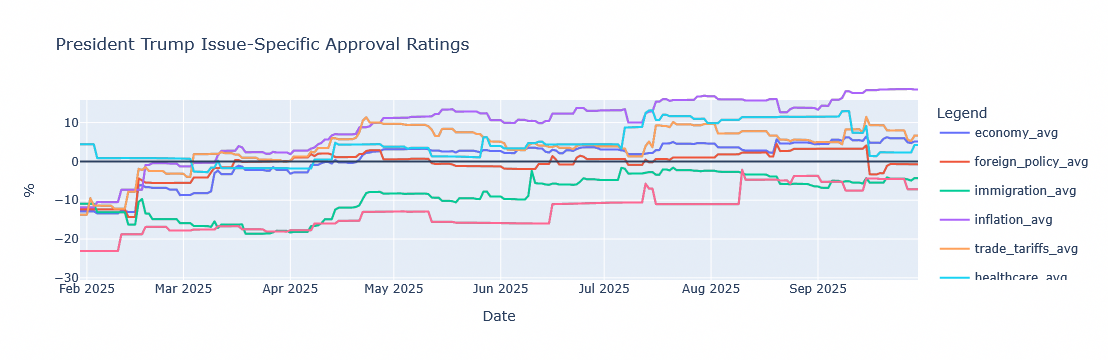

In [229]:
line = px.line(net_issues, x='Date', y=['economy_avg', 'foreign_policy_avg', 'immigration_avg', 'inflation_avg', 'trade_tariffs_avg', 'healthcare_avg',
                                       'crime_avg'])
line.update_traces(hovertemplate=None)
line.update_layout(hovermode='x unified')
fig = go.Figure(data=line.data)
fig.update_layout(
    title='President Trump Issue-Specific Approval Ratings',
    xaxis_title='Date',
    yaxis_title='%',
    legend_title='Legend',
    hovermode='x unified'
)
fig.add_hline(0)
fig.show()

In [230]:
net_issues.to_csv('net_approval_issues.csv')

In [231]:
def current_approval(data: pd.DataFrame, issue: str):
    yes_averages = []
    no_averages = []
    yes_stdevs = []
    no_stdevs = []
    issue_col = []
    date = datetime.datetime.today()
#         try:
    pipelined_df = avgs_pipeline(data, date, issue)
#         except TypeError:
#             print('TypeError')
#             print(date)
    yes_avg = np.sum(pipelined_df['approve_adj'] * pipelined_df['total_weights'])
    no_avg = np.sum(pipelined_df['disapprove_adj'] * pipelined_df['total_weights'])
    yes_std = np.sqrt(np.sum(pipelined_df['total_weights'] * (pipelined_df['approve_adj'] - yes_avg)**2))
    no_std = np.sqrt(np.sum(pipelined_df['total_weights'] * (pipelined_df['disapprove_adj'] - no_avg)**2))
    
    return {'issue': issue, 'approve': yes_avg, 'disapprove': no_avg, 'approve_std': yes_std, 'disapprove_std': no_std}

In [232]:
all_issues = np.unique(approval['issue'])
all_issues

array(['abortion', 'agriculture', 'ai', 'border_security', 'cabinet',
       'canada', 'charlie_kirk_death', 'childcare', 'china',
       'civil_liberties', 'civil_rights', 'climate_change',
       'consumer_protection', 'corruption', 'crime', 'criminal_justice',
       'cryptocurrency', 'cybersecurity', 'dc_takeover', 'death_penalty',
       'defense', 'dei', 'democracy', 'deploying_military_us_cities',
       'deportations', 'disaster_relief', 'doge', 'economy', 'education',
       'energy', 'environment', 'epstein_files', 'executive_orders',
       'federal_workforce', 'flooding_recent', 'foreign_aid',
       'foreign_policy', 'free_speech', 'gas_prices', 'govt_management',
       'govt_spending', 'guns', 'healthcare', 'housing', 'immigration',
       'inequality', 'inflation', 'iran', 'israel',
       'israel_iran_conflict', 'israel_palestine', 'jan_6_handling',
       'jobs', 'judiciary_politicization', 'kilmar_abrego_garcia',
       'lgbtq', 'medicaire_medicaid', 'middle_east', '

In [323]:
qual_issue_polls = approval.groupby(['issue']).agg('count').reset_index()[['issue', 'pollster']]
qual_issue_polls = qual_issue_polls.rename({'pollster': 'count'}, axis=1)
qual_issue_polls = qual_issue_polls[qual_issue_polls['count'] > 3]
all_qual_issues = qual_issue_polls['issue'].values
qual_issue_polls.head()

,issue,count
0,abortion,15
3,border_security,16
9,civil_liberties,8
10,civil_rights,16
11,climate_change,15


In [325]:
qual_issue_polls = approval[approval['issue'].isin(all_qual_issues)]
issues_qual = []
for iss in all_qual_issues:
  if np.unique(qual_issue_polls[qual_issue_polls['issue'] == iss]['pollster']).shape[0] >= 2:
      issues_qual.append(iss)

issues_qual

['abortion',
 'border_security',
 'civil_rights',
 'climate_change',
 'corruption',
 'crime',
 'democracy',
 'deportations',
 'disaster_relief',
 'economy',
 'education',
 'energy',
 'environment',
 'epstein_files',
 'federal_workforce',
 'foreign_policy',
 'govt_management',
 'govt_spending',
 'guns',
 'healthcare',
 'immigration',
 'inflation',
 'iran',
 'israel',
 'israel_iran_conflict',
 'israel_palestine',
 'national_debt',
 'national_security',
 'race_relations',
 'russia',
 'taxes',
 'trade_tariffs',
 'ukraine',
 'unity']

In [233]:
approval['issue'].value_counts()[:15]

issue
economy             184
immigration         166
trade_tariffs       134
inflation           100
foreign_policy       75
healthcare           42
ukraine              34
crime                34
education            28
govt_spending        25
israel_palestine     21
taxes                17
civil_rights         16
border_security      16
guns                 16
Name: count, dtype: int64

In [234]:
all_issues_approval = pd.DataFrame()

for issue in all_issues:
    row = current_approval(approval, issue)
    all_issues_approval = pd.concat([all_issues_approval, pd.DataFrame(row, index=[0])], axis=0)

In [235]:
all_issues_approval['net'] = all_issues_approval['approve'] - all_issues_approval['disapprove']
all_issues_approval = all_issues_approval.sort_values(['net'], ascending=False)
all_issues_approval = all_issues_approval.reset_index().drop(['index'], axis=1)

In [236]:
all_issues_approval

,issue,approve,disapprove,approve_std,disapprove_std,net
0,border_security,54.852903,44.261353,3.283308,2.978266,10.591550
1,defense,50.000464,46.999536,0.000000,0.000000,3.000928
2,democracy,49.751166,48.173737,1.729421,1.202017,1.577429
3,transgender,42.261632,41.756659,0.344725,0.178744,0.504973
4,national_security,45.524839,46.295312,4.161824,1.803506,-0.770473
...,...,...,...,...,...,...
76,pardons,27.249587,54.750413,0.000000,0.000000,-27.500826
77,inflation,33.671276,61.781953,2.614656,2.710081,-28.110677
78,epstein_files,27.151807,55.285047,5.007162,5.335246,-28.133240
79,stock_market,31.387369,66.612632,0.000000,0.000000,-35.225263


In [327]:
all_qual_issues_approval = pd.DataFrame()

for issue in issues_qual:
    row = current_approval(approval, issue)
    all_qual_issues_approval = pd.concat([all_qual_issues_approval, pd.DataFrame(row, index=[0])], axis=0)

In [328]:
all_qual_issues_approval['net'] = all_qual_issues_approval['approve'] - all_qual_issues_approval['disapprove']
all_qual_issues_approval = all_qual_issues_approval.sort_values(['net'], ascending=False)
all_qual_issues_approval = all_qual_issues_approval.reset_index().drop(['index'], axis=1)

In [335]:
len(issues_qual)

34

In [237]:
fig = px.bar(all_issues_approval, x='net', y='issue')
fig.update_layout(
    title='President Trump Issue-Specific Approval Ratings (All Issues, Today)',
    xaxis_title='Net',
    yaxis_title='Issue',
    legend_title='Legend',
)
fig.show()

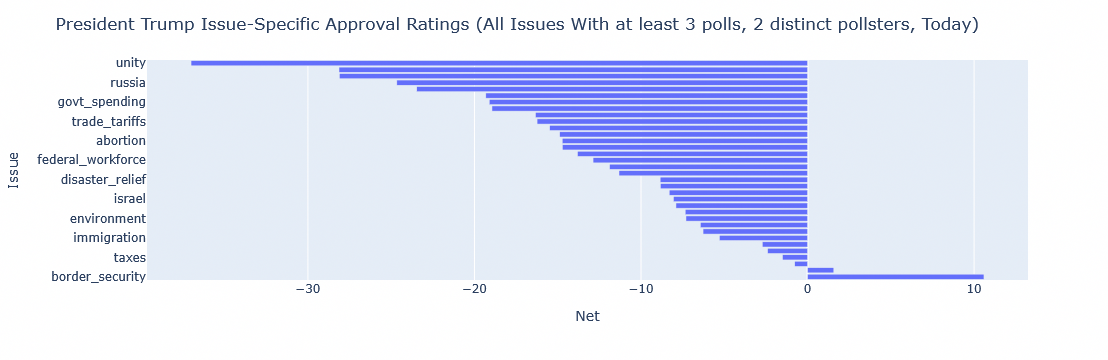

In [331]:
fig = px.bar(all_qual_issues_approval, x='net', y='issue')
fig.update_layout(
    title='President Trump Issue-Specific Approval Ratings (All Issues With at least 3 polls, 2 distinct pollsters, Today)',
    xaxis_title='Net',
    yaxis_title='Issue',
    legend_title='Legend',
)
fig.show()